In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


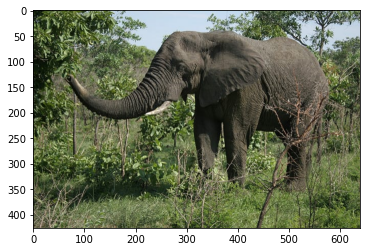

In [2]:
img=cv2.imread('elephant.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
img.shape

(426, 640, 3)

In [4]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [5]:
img_gray=cv2.resize(img_gray,(400,400))

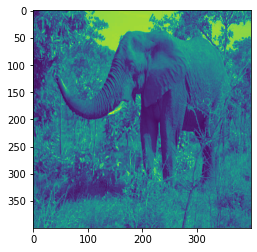

In [6]:
plt.imshow(img_gray)
plt.show()

In [7]:
from sklearn.cluster import KMeans
from collections import Counter

In [8]:
Kmeans=KMeans(n_clusters=10)

In [9]:
labels=Kmeans.fit_predict(img.reshape(img.shape[0]*img.shape[1],3))

In [10]:
labels

array([3, 9, 1, ..., 1, 1, 1])

In [11]:
counts=Counter(labels)

In [12]:
counts

Counter({3: 26874,
         9: 28793,
         1: 31787,
         0: 36906,
         7: 30457,
         8: 36249,
         5: 18848,
         4: 39062,
         2: 8531,
         6: 15133})

In [13]:
center_colors=Kmeans.cluster_centers_

In [14]:
ordered_colors = [center_colors[i] for i in counts.keys()]

In [15]:
ordered_colors

[array([17.60530624, 23.18772792, 10.73576691]),
 array([36.22866669, 44.47674782, 23.87760914]),
 array([57.30133886, 65.70972406, 38.1893268 ]),
 array([112.34579363, 118.84181665,  84.51605723]),
 array([130.98066715, 136.38134871, 102.66832689]),
 array([76.74311344, 84.47957494, 53.61032294]),
 array([151.79511347, 157.72666   , 125.43094097]),
 array([ 94.8426923, 101.9215903,  68.6145563]),
 array([179.60972466, 188.99273579, 161.27779731]),
 array([202.59723782, 218.64944162, 230.04301857])]

In [16]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]

In [18]:
hex_colors

['#707654',
 '#cadae6',
 '#242c17',
 '#11170a',
 '#5e6544',
 '#b3bca1',
 '#4c5435',
 '#828866',
 '#394126',
 '#979d7d']

In [19]:
rgb_colors = [ordered_colors[i] for i in counts.keys()]

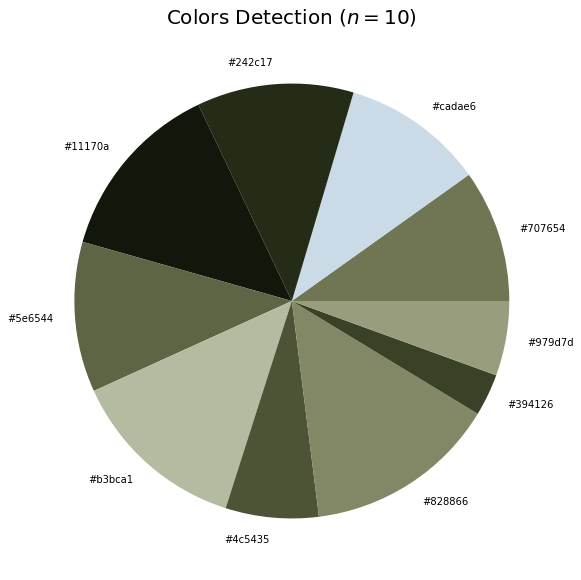

In [20]:
plt.figure(figsize=(10,10))
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors,colors=hex_colors)
plt.show()

In [21]:
rgb_colors

[array([112.34579363, 118.84181665,  84.51605723]),
 array([202.59723782, 218.64944162, 230.04301857]),
 array([36.22866669, 44.47674782, 23.87760914]),
 array([17.60530624, 23.18772792, 10.73576691]),
 array([ 94.8426923, 101.9215903,  68.6145563]),
 array([179.60972466, 188.99273579, 161.27779731]),
 array([76.74311344, 84.47957494, 53.61032294]),
 array([130.98066715, 136.38134871, 102.66832689]),
 array([57.30133886, 65.70972406, 38.1893268 ]),
 array([151.79511347, 157.72666   , 125.43094097])]

In [22]:
def inthreshold(array):
    count = 0
    for i in range(len(array)):
        if array[i]>=-12 and array[i]<=12:
            count=count+1
    return count

In [23]:
def show_color(col_index):
    color = col_index
    sub_image = (img-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = img.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(img)
    plt.subplot(1,3,3)
    plt.imshow(color_arr)

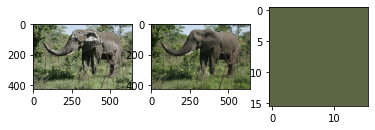

In [24]:
show_color(4)

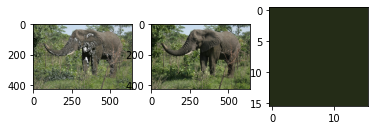

In [25]:
show_color(2)